# BFSI Credit Risk Assignment Case Study

ECL method is used for provisioning the capital buffer to protect banks against possible default of the customers. 
The ECL provisioning is a mandatory accounting principle set by the Basel III norms.
The Basel norms, also known as the Basel Accords or Basel Regulations, are a set of international regulatory standards for the
banking industry. These norms were developed by the Basel Committee on Banking Supervision, which is an international committee
of banking supervisors from around the world. The committee was formed in 1974 by the central bank governors of the Group of 
Ten (G-10) countries. The history of the Basel norms can be traced back to the late 1970s and early 1980s when the banking
industry was facing a series of crises and failures. These crises were caused by a combination of factors, 
including insufficient capital and liquidity, inadequate risk management and weak supervisory oversight. 
In response to these crises, the Basel Committee began to develop a set of international standards for bank capital and 
risk management to strengthen the resilience of the global banking system and reduce the risk of bank failures.

The first Basel Accord, known as Basel I, was issued in 1988, which introduced the first set of minimum capital requirements 
for banks. Basel I was revised in 2004 with the introduction of Basel II, which aimed to improve the risk sensitivity of the 
capital requirements and provide a more sophisticated approach to calculating capital ratios. Subsequently, Basel III was 
introduced in 2009, with stricter rules and regulations, largely in response to the financial crisis of 2007–2008 and the 
ensuing economic recession. It aimed to strengthen the resilience of the banking system against financial stress and improve 
the ability of banks to absorb losses.

The Basel norms are used to ensure that banks maintain sufficient levels of capital and liquidity to withstand financial shocks
and reduce the risk of bank failures. The norms cover a range of areas, including minimum capital requirements, risk-weighted 
assets and the calculation of capital ratios. Banks are required to comply with the Basel norms to ensure the stability and 
resilience of the global financial system. Non-compliance with these norms can result in regulatory penalties and other 
consequences for banks.

To comply with the regulatory norms, a bank needs to provision funds. Provisioning refers to the process of setting aside funds
to cover potential losses from defaulted loans. Therefore, provisioning is an important part of a bank's risk management 
strategy. The provisioning by banks is also an important macroeconomic metric to gauge the economic conditions of a country. 
Banks may use several methods to calculate the amount of provisioning required, such as lifetime expected loss (LEL), stressed 
loss analysis (SLA), current expected credit loss (CECL) and through-the-cycle (TTC) and expected credit loss (ECL).

For this assignment, we will focus on the expected credit loss (ECL) calculation method.

Expected credit loss (ECL) computation is a method used in credit risk management to determine the amount of loss a bank is 
expected to incur in the event a borrower defaults on their loan. Different banks may use different methodologies for 
calculating the expected credit loss (ECL) and provisioning. rk of a bank. Banks are allowed to use their own methodologies 
and incorporate factors relevant to their specific business operations. Some banks may choose to use historical data and 
statistical models to estimate the components of ECL calculation, while others may rely on expert judgement. 
The choice of the method can vary depending on factors such as the bank's risk appetite, the nature of the loans and the 
available data. Additionally, some banks may include certain external factors, such as macroeconomic conditions, in their 
calculations, while others may not.

The formula for ECL typically used in practice is as follows:
ECL = EAD x PD x LGD
Expected credit loss = Exposure at default x Probability of Default x Loss given default]
ECLs are calculated based on the exposure at default (EAD), probability of default (PD) and the loss given default (LGD) 
for each borrower. Banks can calculate the ECL for different points in time based on their risk management strategy and 
regulatory requirements.

For this assignment, we will consider the latest date from which the data is available as the point in time. 
This means we will estimate the expected credit loss (ECL) for the borrower assuming that the borrower has defaulted at the 
present point in time. The objective is to build a statistical model to estimate borrowers’ Loss Given  Default (LGD).


In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the datasets
main = pd.read_csv("main_loan_base.csv")
monthly = pd.read_csv("monthly_balance_base.csv")
repayment = pd.read_csv("repayment_base.csv")

In [3]:
#importing the test datasets
test_main = pd.read_csv("test_main_loan_base.csv")
test_monthly = pd.read_csv("test_monthly_balance_base.csv")
test_repayment = pd.read_csv("test_repayment_base.csv")

In [4]:
main.sample(5)

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
33569,LN61550829,Divij Mandal,"H.No. 960, Buch Nagar\nParbhani 361327",Car,1654940,420679.89,4,2,5,65,1,13.4,148125.49,2012-10-13,2013-01-18
13987,LN88655510,Riaan Manda,"826\nDhingra Street, Kozhikode 570887",Personal,434744,26947.63,0,0,2,102,4,9.2,10859.96,2020-05-31,2023-11-03
40171,LN92421265,Jayan Warrior,H.No. 28\nMann Nagar\nKochi-928744,Personal,233897,53503.68,3,1,8,52,4,8.9,5809.44,2015-06-12,2016-11-17
8355,LN17342437,Badal Rattan,"77/28, Krishnan Zila, Bahraich 527625",Consumer-Durable,15760,4528.83,0,1,8,94,3,12.5,527.23,2019-10-07,2021-10-13
40680,LN46456446,Priyansh Sane,"69/154\nGoda, Mahbubnagar 050010",Consumer-Durable,9294,2205.00,3,3,12,74,3,10.9,303.83,2017-05-21,2018-11-27


In [5]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       50000 non-null  object 
 1   customer_name      50000 non-null  object 
 2   customer_address   50000 non-null  object 
 3   loan_type          50000 non-null  object 
 4   loan_amount        50000 non-null  int64  
 5   collateral_value   50000 non-null  float64
 6   cheque_bounces     50000 non-null  int64  
 7   number_of_loans    50000 non-null  int64  
 8   missed_repayments  50000 non-null  int64  
 9   vintage_in_months  50000 non-null  int64  
 10  tenure_years       50000 non-null  int64  
 11  interest           50000 non-null  float64
 12  monthly_emi        50000 non-null  float64
 13  disbursal_date     50000 non-null  object 
 14  default_date       50000 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 5.7+ MB


In [6]:
main['disbursal_date'] = pd.to_datetime(main['disbursal_date'], infer_datetime_format=True)
main['default_date'] = pd.to_datetime(main['default_date'], infer_datetime_format=True)
#data['repayment_date'] = pd.to_datetime(data['repayment_date'], infer_datetime_format=True)

In [7]:
test_main['disbursal_date'] = pd.to_datetime(test_main['disbursal_date'], infer_datetime_format=True)
test_main['default_date'] = pd.to_datetime(test_main['default_date'], infer_datetime_format=True)

In [8]:
#Creating a new data set with zero duplicates.
main = main[~main['loan_acc_num'].duplicated()]
print(main.shape)

(49985, 15)


In [9]:
#Creating a new data set with zero duplicates.
test_main = test_main[~test_main['loan_acc_num'].duplicated()]
print(test_main.shape)

(9997, 15)


In [10]:
repayment.sample(5)

,loan_acc_num,repayment_amount,repayment_date
346448,LN61310623,11303.820000,2018-05-18
338447,LN80934975,4646.660000,2015-11-20
397372,LN14385009,8.705446,2013-12-01
389038,LN72066129,17328.920000,2021-01-05
366011,LN92718918,1391.590000,2017-01-09


In [11]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626601 entries, 0 to 626600
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_acc_num      626601 non-null  object 
 1   repayment_amount  626601 non-null  float64
 2   repayment_date    626601 non-null  object 
dtypes: float64(1), object(2)
memory usage: 14.3+ MB


In [12]:
repayment['loan_acc_num'].nunique()

46008

In [13]:
repayment = round(repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
repayment = pd.DataFrame({"loan_acc_num":repayment.index, "repayment_amount":repayment.values})
repayment.head()

,loan_acc_num,repayment_amount
0,LN10000701,40020.99
1,LN10001077,112218.47
2,LN10004116,290634.94
3,LN10007976,337321.72
4,LN10010204,61290.49


In [14]:
test_repayment = round(test_repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
test_repayment = pd.DataFrame({"loan_acc_num":test_repayment.index, "repayment_amount":test_repayment.values})
test_repayment.head()

,loan_acc_num,repayment_amount
0,LN10011015,1725.31
1,LN10028091,3560.31
2,LN10033713,11582.17
3,LN10045654,66181.74
4,LN10051605,87664.41


In [15]:
main.shape

(49985, 15)

In [16]:
repayment.shape

(46008, 2)

In [17]:
df = pd.merge(
    left=main,
    right=repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [18]:
test_df = pd.merge(
    left=test_main,
    right=test_repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [19]:
df.shape

(49985, 16)

In [20]:
#deriving the target
df['target'] = (df['loan_amount']-(df['collateral_value']+df['repayment_amount']))/df['loan_amount']

In [21]:
df.sample(5)

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,target
40484,LN88336735,Anvi Madan,002\nLall Marg\nKozhikode 541878,Car,1556244,320887.15,3,2,5,69,2,14.3,74940.51,2013-09-20,2015-01-24,487957.59,0.480258
271,LN83766700,Ira Sen,H.No. 07\nBabu Nagar\nTirunelveli-308160,Consumer-Durable,22394,644.43,2,1,7,29,1,9.2,1960.47,2013-12-07,2014-08-25,7841.88,0.621045
43240,LN29827562,Vedika Setty,"H.No. 73, Sundaram Street\nVasai-Virar-855358",Two-Wheeler,237197,5299.66,4,3,13,20,2,14.7,11467.11,2015-10-21,2016-02-11,28450.68,0.857712
41973,LN49526488,Pranay Sani,"56/41\nSavant, Nandyal 509839",Two-Wheeler,180498,1166.86,0,0,8,132,5,11.0,3924.46,2017-03-01,2018-09-25,150728.46,0.158465
5532,LN68739544,Mishti Choudhary,"H.No. 89, Choudhary Nagar\nBharatpur 775366",Two-Wheeler,211996,42867.76,3,2,3,15,1,14.1,19044.49,2015-08-31,2016-04-23,71458.67,0.460714


In [22]:
df.isnull().sum()

loan_acc_num            0
customer_name           0
customer_address        0
loan_type               0
loan_amount             0
collateral_value        0
cheque_bounces          0
number_of_loans         0
missed_repayments       0
vintage_in_months       0
tenure_years            0
interest                0
monthly_emi             0
disbursal_date          0
default_date            0
repayment_amount     3977
target               3977
dtype: int64

In [23]:
test_df.isnull().sum()

loan_acc_num           0
customer_name          0
customer_address       0
loan_type              0
loan_amount            0
collateral_value       0
cheque_bounces         0
number_of_loans        0
missed_repayments      0
vintage_in_months      0
tenure_years           0
interest               0
monthly_emi            0
disbursal_date         0
default_date           0
repayment_amount     768
dtype: int64

In [24]:
#df['repayment_date'] = df['repayment_date'].fillna(df['repayment_date'].mode()[0])

In [25]:
#null value imputation
df['repayment_amount'] = df['repayment_amount'].fillna(0)

In [26]:
#null value imputation
test_df['repayment_amount'] = test_df['repayment_amount'].fillna(0)

In [27]:
#null value imputation
df['target'] = df['target'].fillna(df['target'].mean())

In [28]:
#creating new variable: feature engineering
df['due'] = df['loan_amount'] - df['repayment_amount']

In [29]:
#creating new variable: feature engineering
test_df['due'] = test_df['loan_amount'] - test_df['repayment_amount']

In [30]:
monthly.sample(5)

,loan_acc_num,date,balance_amount
3475570,LN16335394,2003-08-13,259.021994
3353797,LN94925283,2012-11-13,133.865457
1280607,LN34497369,2005-11-30,259.977641
3887051,LN75516109,2010-01-30,5627.329328
2666720,LN42572632,2015-10-26,6417.783243


In [31]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002490 entries, 0 to 4002489
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   loan_acc_num    object 
 1   date            object 
 2   balance_amount  float64
dtypes: float64(1), object(2)
memory usage: 91.6+ MB


In [32]:
monthly['loan_acc_num'].nunique()

49671

In [33]:
monthly = round(monthly.groupby('loan_acc_num')['balance_amount'].mean(),2)
monthly = pd.DataFrame({"loan_acc_num":monthly.index, "average_monthly_balance":monthly.values})
monthly.head()

,loan_acc_num,average_monthly_balance
0,LN10000701,2301.88
1,LN10001077,2296.28
2,LN10004116,8887.38
3,LN10007976,9420.56
4,LN10010204,6446.21


In [34]:
test_monthly = round(test_monthly.groupby('loan_acc_num')['balance_amount'].mean(),2)
test_monthly = pd.DataFrame({"loan_acc_num":test_monthly.index, "average_monthly_balance":test_monthly.values})
test_monthly.head()

,loan_acc_num,average_monthly_balance
0,LN10011015,25.09
1,LN10028091,62.53
2,LN10033713,182.41
3,LN10045654,1838.35
4,LN10051605,3374.17


In [35]:
#Merge the datasets
data = pd.merge(
    left=df,
    right=monthly,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [36]:
#Merge the datasets
test_data = pd.merge(
    left=test_df,
    right=test_monthly,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [37]:
data.shape

(49985, 19)

In [38]:
test_data.shape

(9997, 18)

In [39]:
data.isnull().sum()

loan_acc_num                 0
customer_name                0
customer_address             0
loan_type                    0
loan_amount                  0
collateral_value             0
cheque_bounces               0
number_of_loans              0
missed_repayments            0
vintage_in_months            0
tenure_years                 0
interest                     0
monthly_emi                  0
disbursal_date               0
default_date                 0
repayment_amount             0
target                       0
due                          0
average_monthly_balance    314
dtype: int64

In [40]:
#null value imputation
data['average_monthly_balance'] = data['average_monthly_balance'].fillna(data['average_monthly_balance'].mean())

In [41]:
#null value imputation
test_data['average_monthly_balance'] = test_data['average_monthly_balance'].fillna(test_data['average_monthly_balance'].mean())

In [42]:
data.isnull().sum()

loan_acc_num               0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
repayment_amount           0
target                     0
due                        0
average_monthly_balance    0
dtype: int64

In [43]:
test_data.isnull().sum()

loan_acc_num               0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
repayment_amount           0
due                        0
average_monthly_balance    0
dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49984
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_acc_num             49985 non-null  object        
 1   customer_name            49985 non-null  object        
 2   customer_address         49985 non-null  object        
 3   loan_type                49985 non-null  object        
 4   loan_amount              49985 non-null  int64         
 5   collateral_value         49985 non-null  float64       
 6   cheque_bounces           49985 non-null  int64         
 7   number_of_loans          49985 non-null  int64         
 8   missed_repayments        49985 non-null  int64         
 9   vintage_in_months        49985 non-null  int64         
 10  tenure_years             49985 non-null  int64         
 11  interest                 49985 non-null  float64       
 12  monthly_emi              49985 n

In [45]:
data.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,target,due,average_monthly_balance
count,4.998500e+04,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,4.998500e+04,49985.000000,4.998500e+04,49985.000000
mean,3.817142e+05,57195.113444,1.764769,1.509573,9.807482,80.016705,2.994578,11.484611,16593.115676,1.514337e+05,0.423265,2.302806e+05,7679.277191
std,5.037769e+05,93412.679667,1.760305,1.259326,7.787036,44.141987,1.415455,2.019790,26696.292090,2.554824e+05,0.225701,3.437854e+05,16071.151167
min,2.000000e+03,0.070000,0.000000,0.000000,0.000000,15.000000,1.000000,8.000000,42.520000,0.000000e+00,-5.708000,-8.573322e+04,0.100000
25%,2.393400e+04,3329.430000,0.000000,0.000000,4.000000,44.000000,2.000000,9.700000,1158.280000,6.761950e+03,0.242430,1.580488e+04,417.980000
50%,1.926920e+05,19866.280000,1.000000,1.000000,8.000000,78.000000,3.000000,11.500000,6541.020000,4.849626e+04,0.423265,9.599627e+04,2186.470000
75%,4.334780e+05,62323.370000,3.000000,2.000000,15.000000,113.000000,4.000000,13.200000,19438.430000,1.668996e+05,0.600358,2.602902e+05,7557.930000
max,1.999992e+06,592545.710000,11.000000,6.000000,38.000000,258.000000,5.000000,15.000000,179521.680000,1.852111e+06,0.898372,1.997948e+06,261799.900000


In [46]:
#dropping the records with negative LGD
data = data.drop(data[data['target']<0].index)

In [47]:
test = test_data.copy()

### EDA

In [48]:
#separating numeric and categorical features
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

In [49]:
#top 10 correlated features
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(numeric_data, 10))

Top Absolute Correlations
loan_amount        due                        0.886538
                   monthly_emi                0.819133
                   collateral_value           0.809763
collateral_value   due                        0.803826
monthly_emi        average_monthly_balance    0.798077
loan_amount        repayment_amount           0.780483
monthly_emi        due                        0.718615
repayment_amount   average_monthly_balance    0.714145
vintage_in_months  target                     0.705141
collateral_value   monthly_emi                0.668101
dtype: float64


In [50]:
from statistics import mean
print("Average Monthly EMI: ",round(mean(data['monthly_emi']),2))
print("Average Repayment Amount: ",round(mean(data['repayment_amount']),2))
print("Average Loan Amount: ",round(mean(data['loan_amount']),2))

Average Monthly EMI:  16553.64
Average Repayment Amount:  150993.26
Average Loan Amount:  381630.43


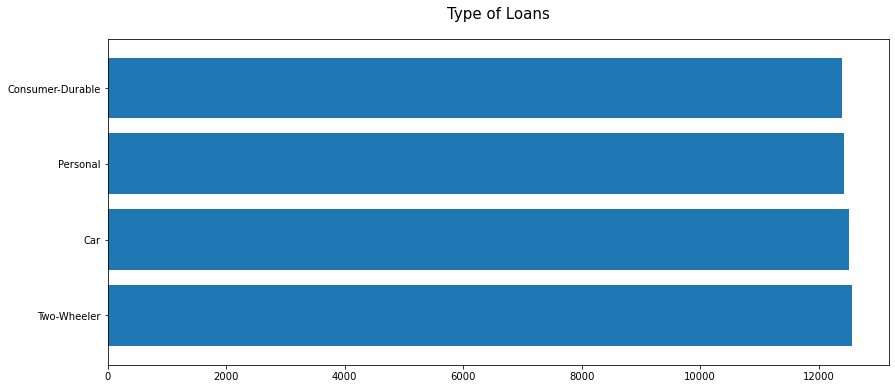

In [51]:
#Univariate Analysis
plt.figure(figsize = [14,6])
data["loan_type"].value_counts().plot.barh(width = .8)
plt.title("Type of Loans", fontdict={"fontsize":15}, pad =20)
plt.show()

In [52]:
def Uni_Analysis_Numarical(dataframe, column):
    sns.set(style='darkgrid')
    plt.figure(figsize=(25, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(data=dataframe, x=column, orient='v').set(title='Box Plot')
    
    plt.subplot(1, 3, 2)
    sns.distplot(dataframe[column].dropna()).set(title='Distplot')
    plt.show()

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


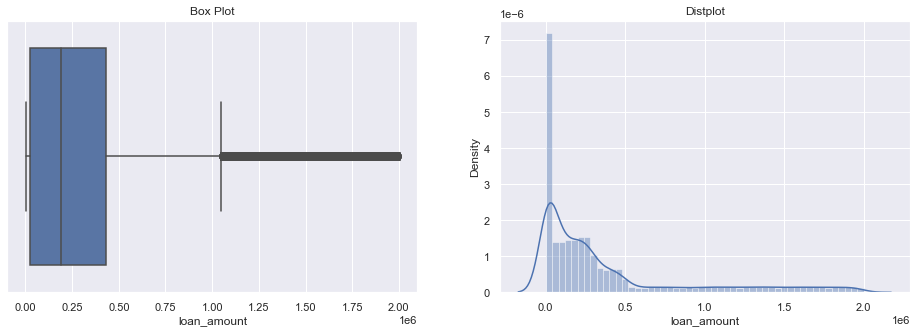

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


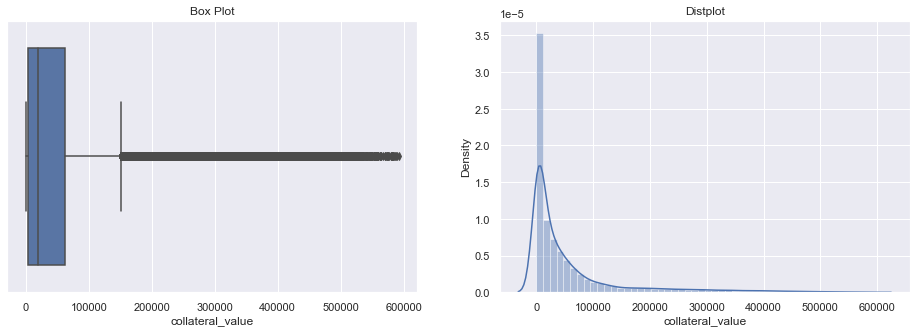

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


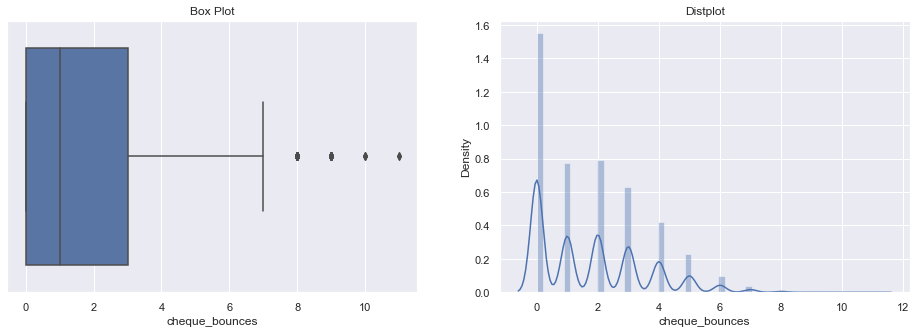

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


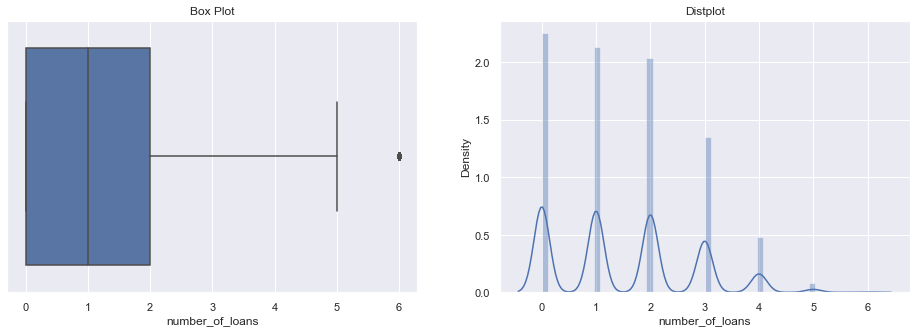

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


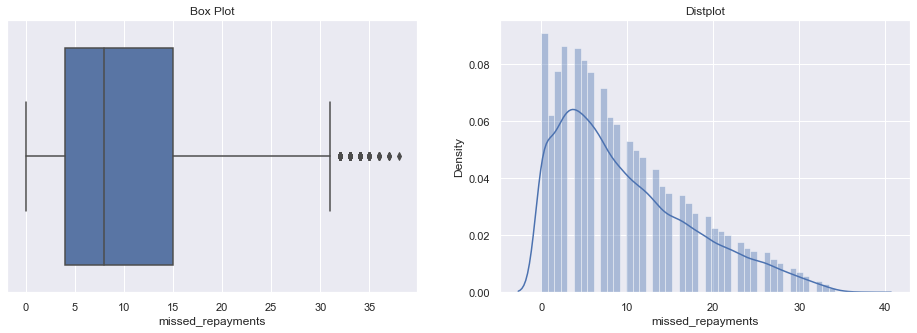

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


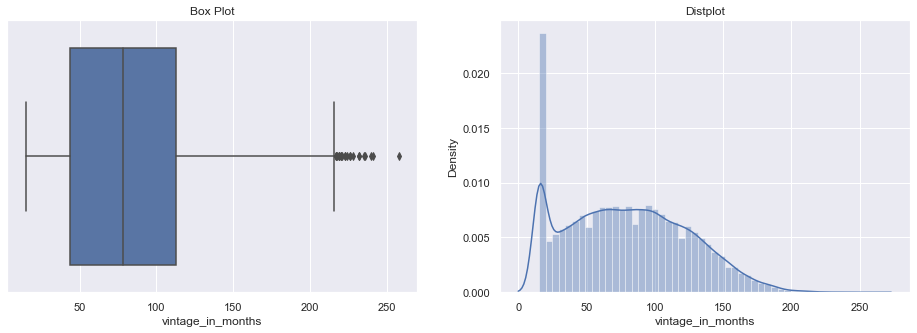

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


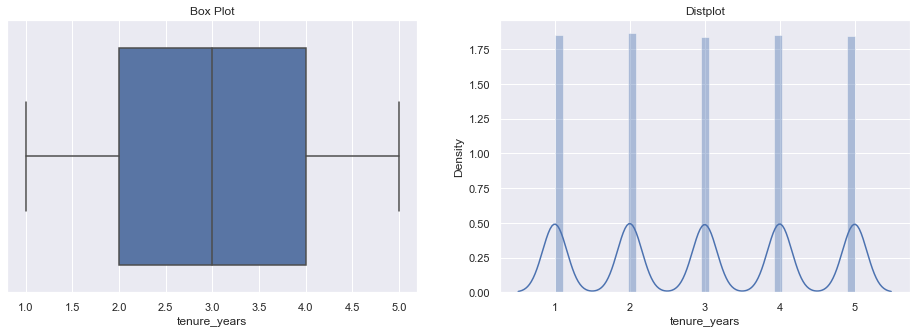

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


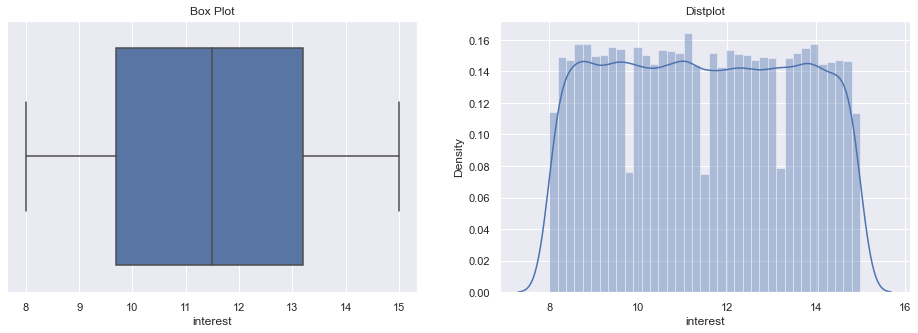

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


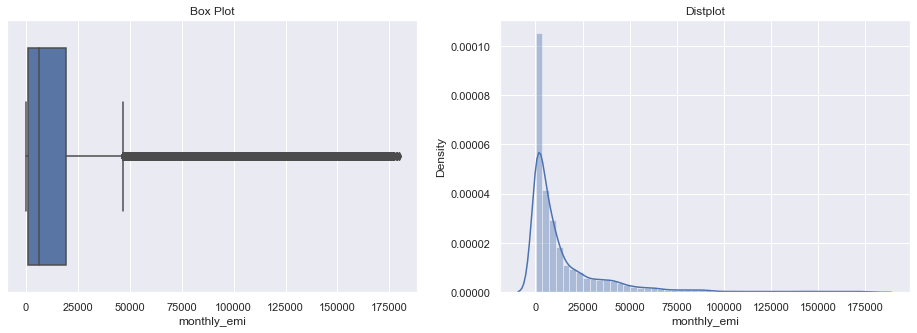

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


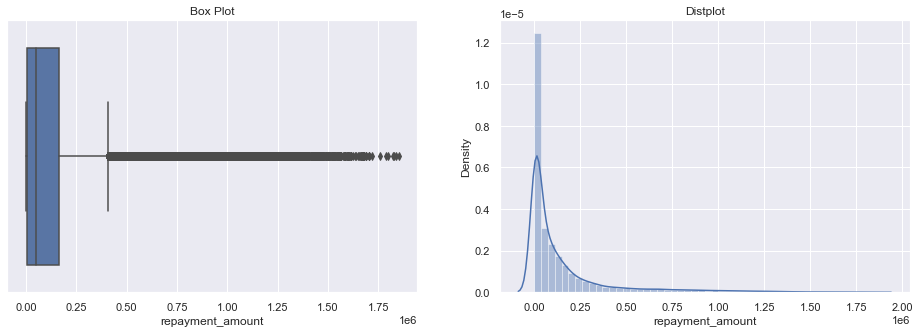

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


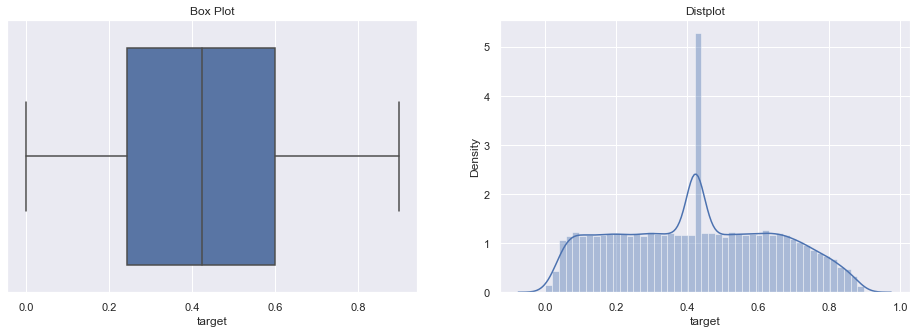

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


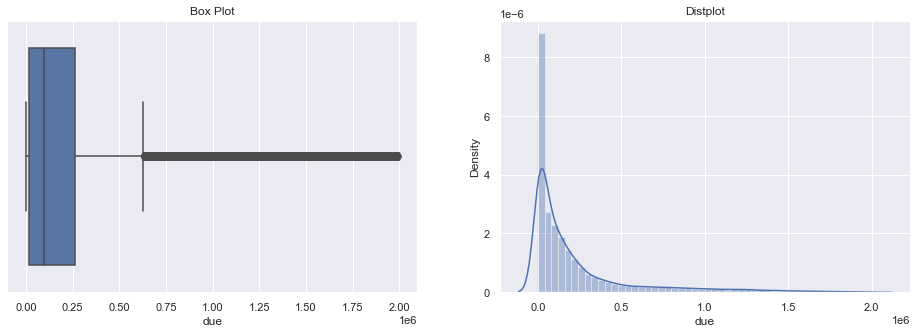

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


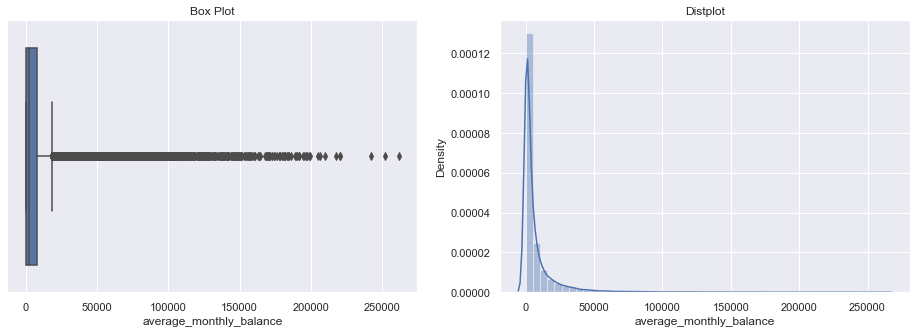

In [53]:
#Distribution of the numerical features
for i in numeric_data:
    Uni_Analysis_Numarical(data,i)

<AxesSubplot:xlabel='loan_amount', ylabel='repayment_amount'>

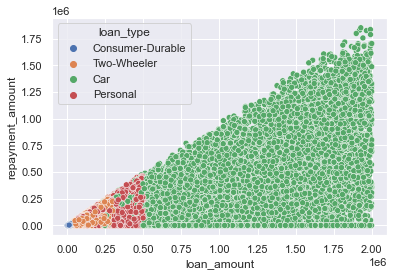

In [54]:
sns.scatterplot(x=data.loan_amount, 
                y = data.repayment_amount, 
                data=data,hue = 'loan_type')

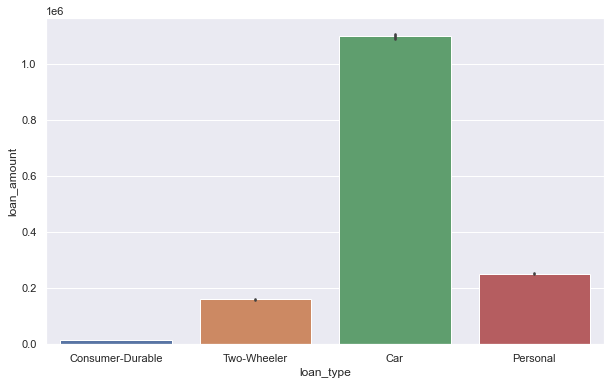

In [55]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.loan_amount)
plt.show()

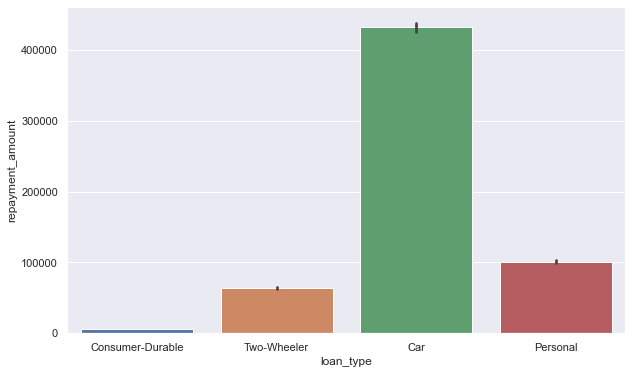

In [56]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.repayment_amount)
plt.show()

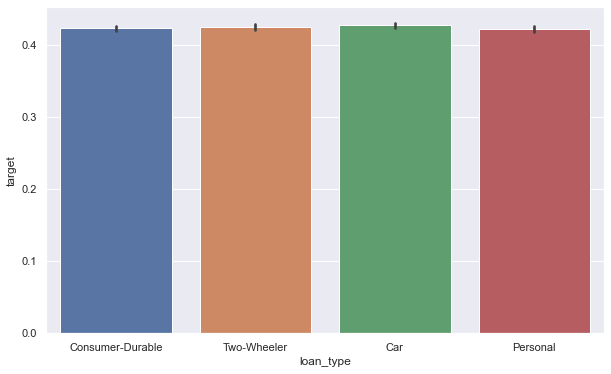

In [57]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.target)
plt.show()

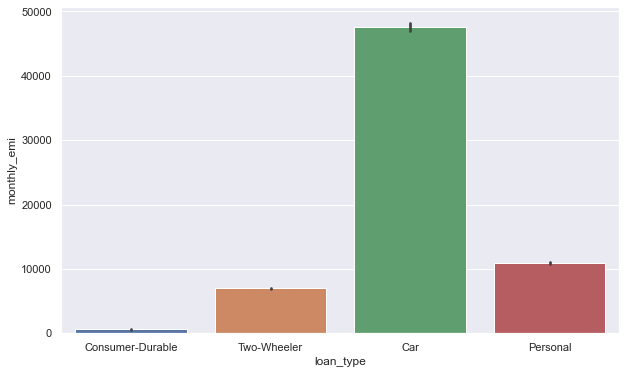

In [58]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.monthly_emi)
plt.show()

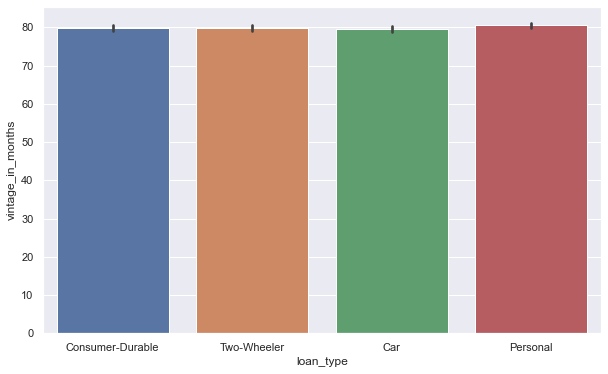

In [59]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.vintage_in_months)
plt.show()

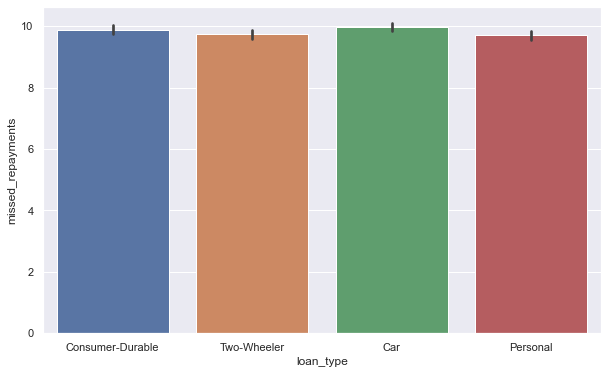

In [60]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.missed_repayments)
plt.show()

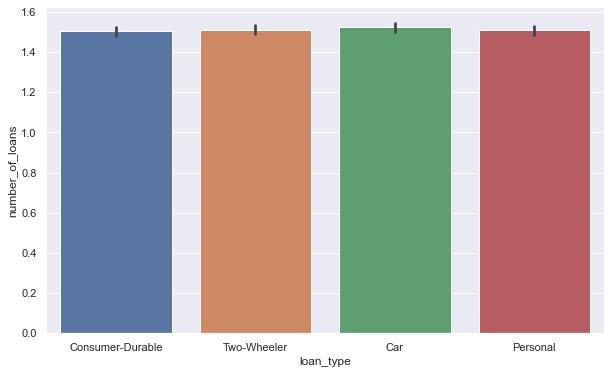

In [61]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.number_of_loans)
plt.show()

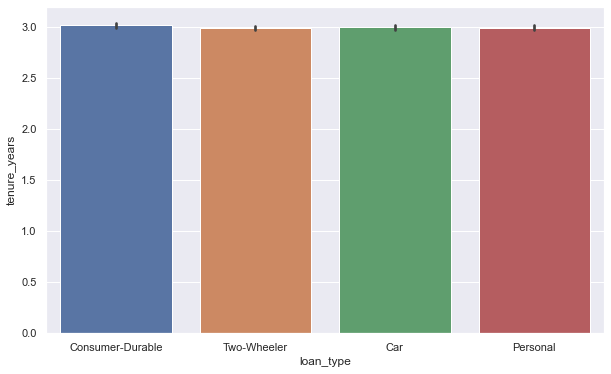

In [62]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.tenure_years)
plt.show()

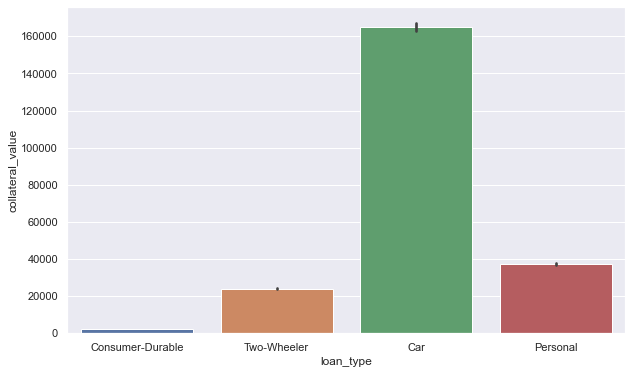

In [63]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.collateral_value)
plt.show()

In [64]:
#separating numeric and categorical features
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

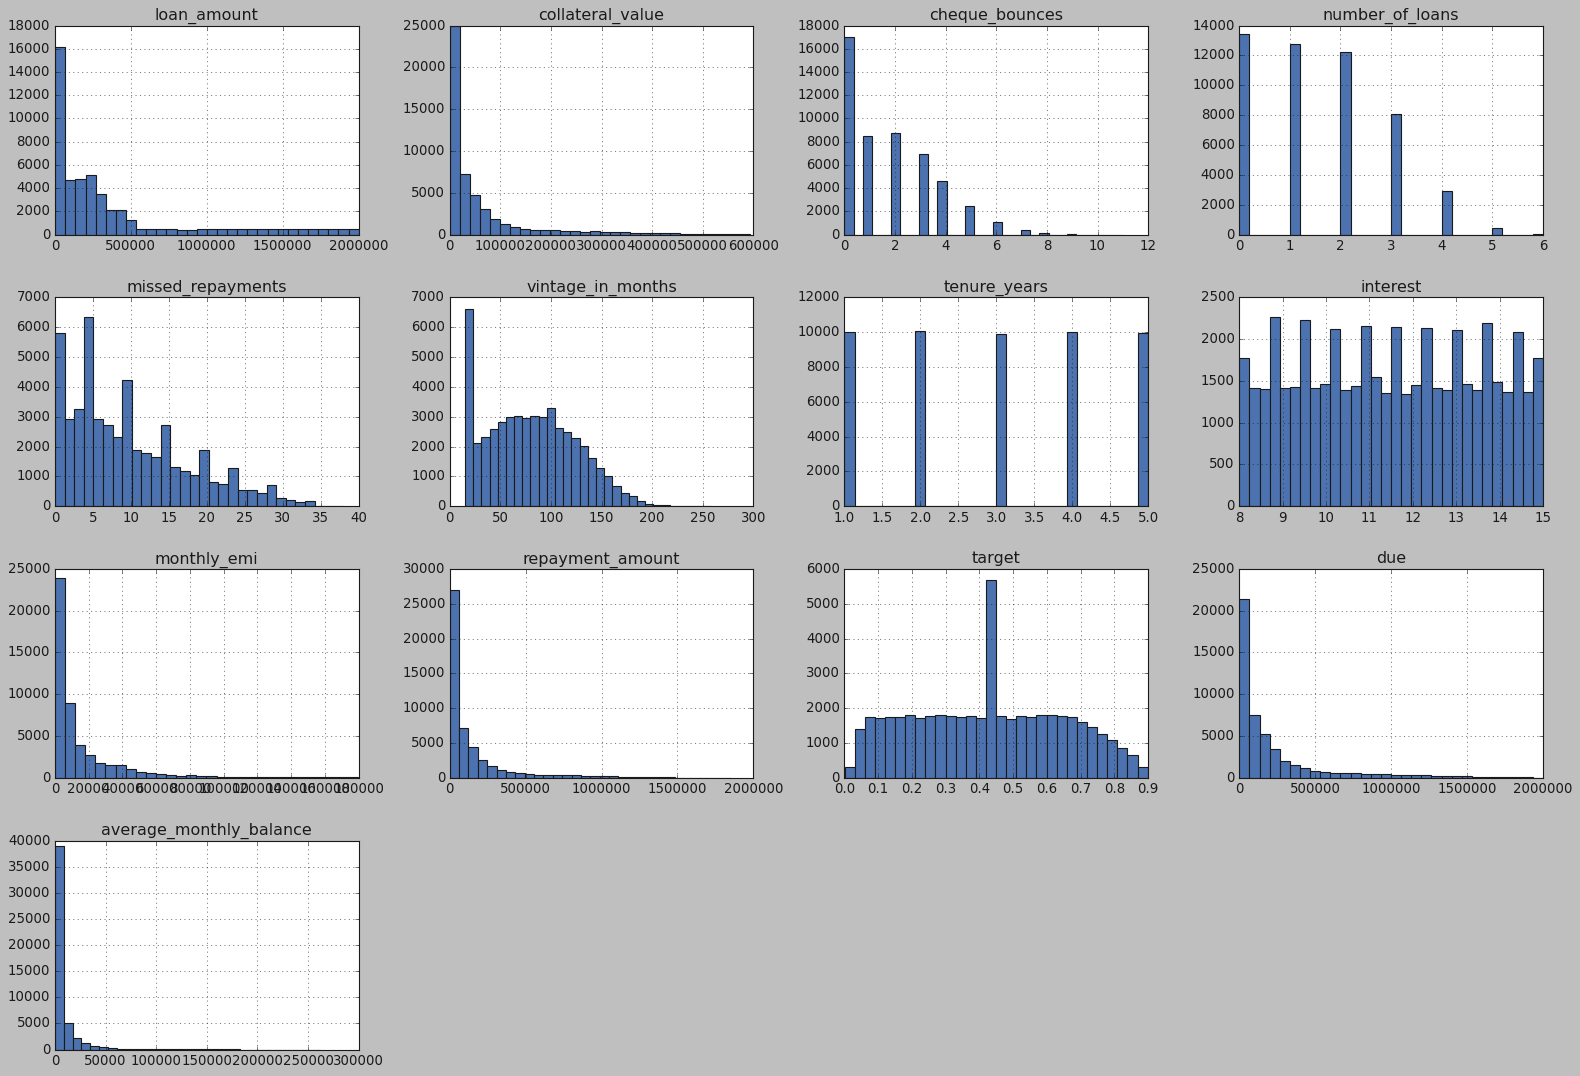

In [65]:
#plt.figure(figsize = (24,24))
plt.style.use('classic')
data[numeric_data.columns].hist(bins=30, figsize = (24,16))
plt.show()

In [66]:
numeric_data.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'target', 'due',
       'average_monthly_balance'],
      dtype='object')

<AxesSubplot:>

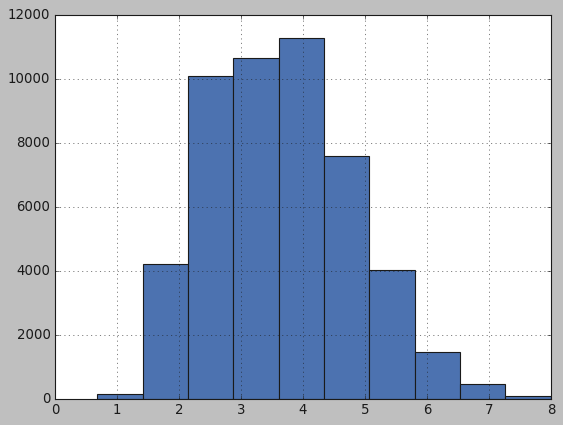

In [67]:
(data['average_monthly_balance']**(1/6)).hist()

<AxesSubplot:>

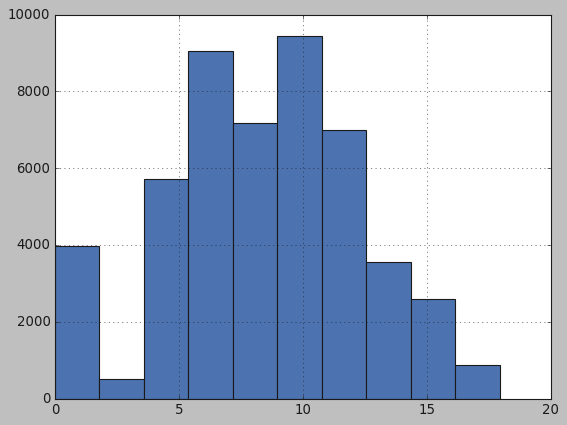

In [68]:
(data['repayment_amount']**(1/5)).hist()
#fig = plt.figure()
#(data['cheque_bounces']).hist()

In [69]:
data['loan_amount'] = data['loan_amount']**(1/5)

In [70]:
data['collateral_value'] = data['collateral_value']**(1/5)

In [71]:
data['cheque_bounces'] = data['cheque_bounces']**(1/2)

In [72]:
data['missed_repayments'] = data['missed_repayments']**(1/2)

In [73]:
data['vintage_in_months'] = data['vintage_in_months']**(1/2)

In [74]:
data['monthly_emi'] = data['monthly_emi']**(1/6)

In [75]:
data['repayment_amount'] = data['repayment_amount']**(1/5)

In [76]:
data['average_monthly_balance'] = data['average_monthly_balance']**(1/6)

In [77]:
test_data['collateral_value'] = test_data['collateral_value']**(1/5)
test_data['cheque_bounces'] = test_data['cheque_bounces']**(1/2)
test_data['missed_repayments'] = test_data['missed_repayments']**(1/2)
test_data['vintage_in_months'] = test_data['vintage_in_months']**(1/2)
test_data['monthly_emi'] = test_data['monthly_emi']**(1/6)
test_data['repayment_amount'] = test_data['repayment_amount']**(1/5)
test_data['average_monthly_balance'] = test_data['average_monthly_balance']**(1/8)

<AxesSubplot:>

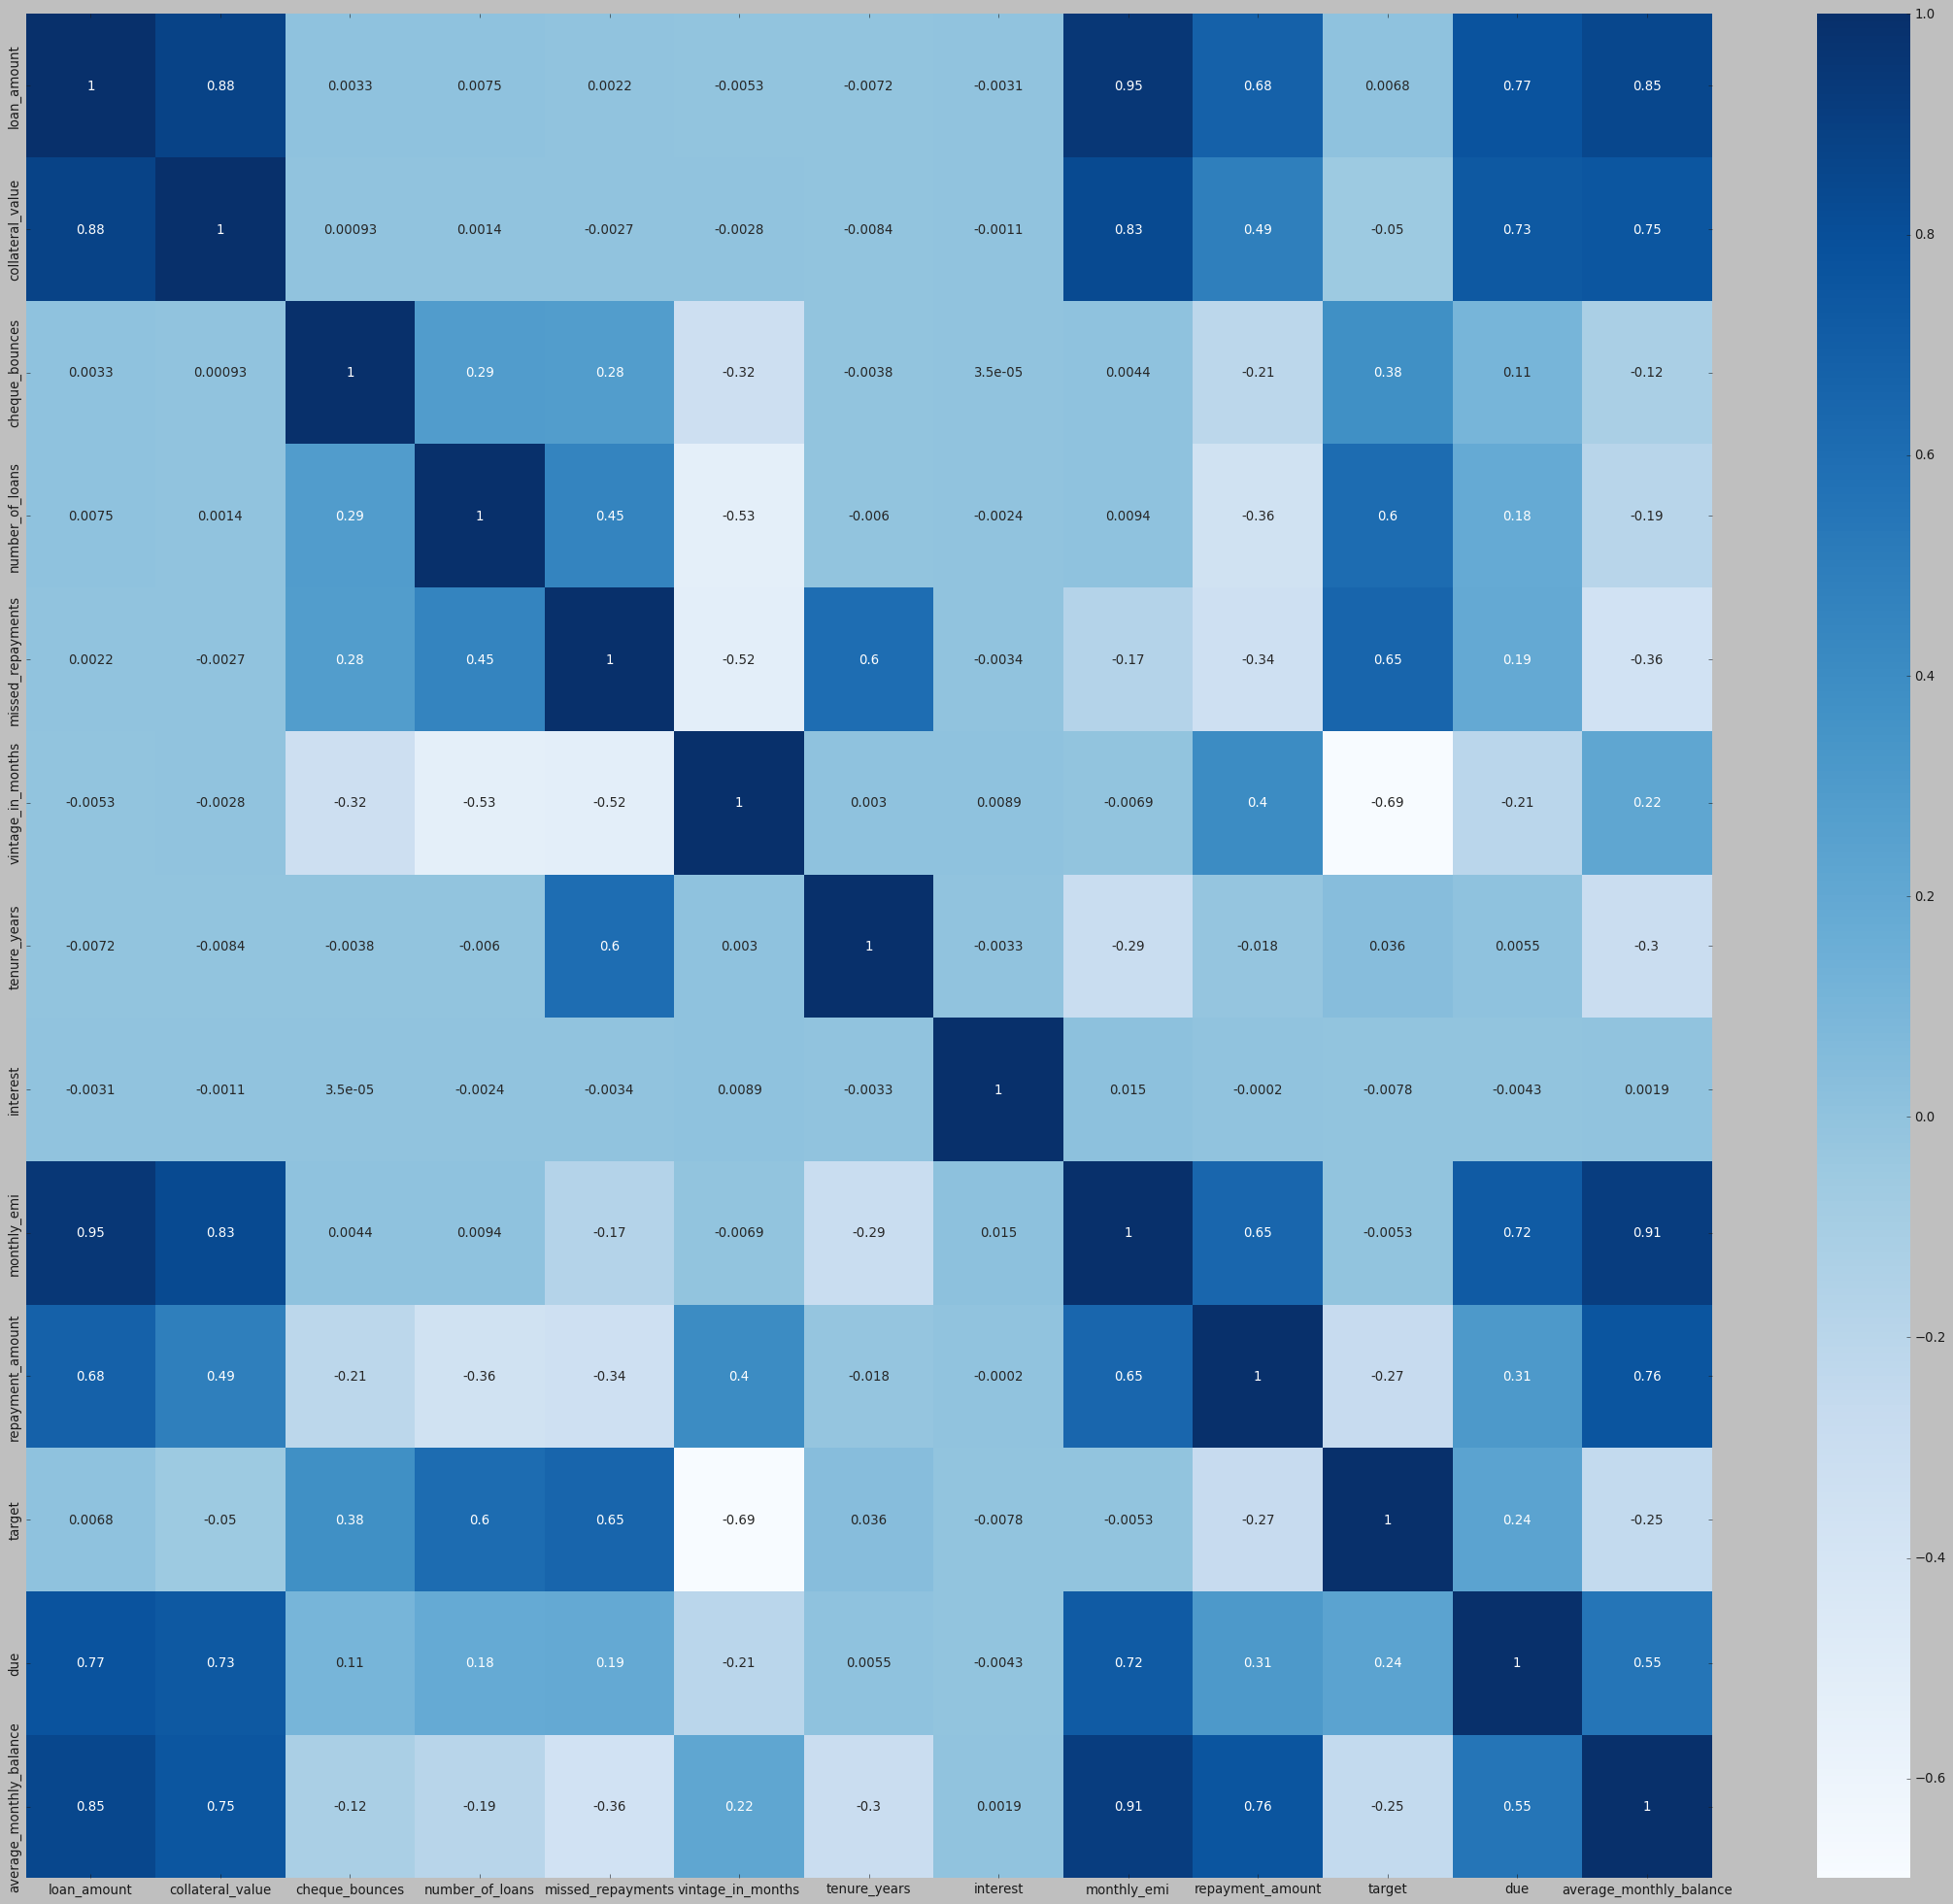

In [78]:
#Correlation Plot: Heatmap
import seaborn as sns
plt.figure(figsize = (35,30))

corr = data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

In [79]:
categorical_data.columns

Index(['loan_acc_num', 'customer_name', 'customer_address', 'loan_type',
       'disbursal_date', 'default_date'],
      dtype='object')

In [80]:
curr_time = pd.to_datetime("now")

C:\Users\Rahul\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [81]:
#deriving new feature using date column
data['difference'] = (curr_time-data['default_date'])/np.timedelta64(1,'D')

In [82]:
#deriving new feature using date column
test_data['difference'] = (curr_time-test_data['default_date'])/np.timedelta64(1,'D')

In [83]:
#dropping unnecessary columns for model building
data = data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],1)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_10948\2745645270.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],1)


In [84]:
#dropping unnecessary columns for model building
test_data = test_data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],1)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_10948\761709410.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_data = test_data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],1)


In [85]:
#encoding
encoded = pd.get_dummies(data['loan_type'],drop_first=True)

In [86]:
#encoding
test_encoded = pd.get_dummies(test_data['loan_type'],drop_first=True)

In [87]:
data = data.drop(['loan_type'],axis=1)

In [88]:
test_data = test_data.drop(['loan_type'],axis=1)

In [89]:
data = pd.concat([data,encoded],axis=1)

In [90]:
test_data = pd.concat([test_data,test_encoded],axis=1)

In [91]:
#train-test split
from sklearn.model_selection import train_test_split
X = data.drop(columns=['target'])
y = data [['target']]
# Choose any random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [92]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
unseen = sc.fit_transform(test_data)

In [94]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Using Recusrive Feature Elimination

In [95]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [96]:
from sklearn.linear_model import *
from  sklearn import metrics
#Rsquared on test set
y_pred_lr = rfe.predict(X_test)
metrics.r2_score(y_test, y_pred_lr)

0.7756349800595066

### Using Multiple Linear Regression

In [97]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

lm.fit(X_train, y_train)
#Rsquared on test set
y_pred_lr = lm.predict(X_test)
metrics.r2_score(y_test, y_pred_lr)

0.7811962854570624

### Using Random Forest Regressor

In [98]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(bootstrap= True,n_estimators = 200, random_state = 42, max_depth=4,max_features=None,min_samples_leaf= 2,min_samples_split= 4)
rf_regressor.fit(X_train, y_train)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_10948\3012908678.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor(max_depth=4, max_features=None, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=200, random_state=42)

In [99]:
y_pred_train = rf_regressor.predict(X_train)
print(r2_score(y_train, y_pred_train))

0.7245706459113583


In [100]:
y_pred_test = rf_regressor.predict(X_test)
print(r2_score(y_test, y_pred_test))

0.7273636647483164


### Using Gradient Boosting Regressor

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 4,
          'learning_rate': 0.01,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train, y_train)

y_pred=gbr.predict(X_test)
#
# Print Coefficient of determination R^2
#
print("R squared: %.3f" % gbr.score(X_test, y_test))

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


R squared: 0.901


In [102]:
y_pred_train=gbr.predict(X_train)
#
# Print Coefficient of determination R^2
print("R_squared in train set: ",r2_score(y_train, y_pred_train))

R_squared in train set:  0.9040959918040924


In [103]:
y_pred_test=gbr.predict(X_test)
#
# Print Coefficient of determination R^2
print("R_squared in test set: ",r2_score(y_test, y_pred_test))

R_squared in test set:  0.9009826242325176


[0.00000000e+00 8.27642038e-03 6.29420805e-03 9.57308377e-02
 2.29346406e-01 4.55337925e-01 5.66951780e-02 0.00000000e+00
 2.61179097e-03 1.05657884e-01 3.97555164e-02 2.93833105e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


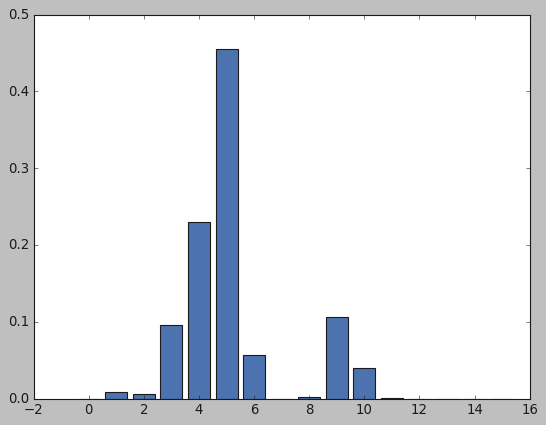

In [104]:
# plot feature importance
# feature importance
print(gbr.feature_importances_)
# plot
plt.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
plt.show()

<AxesSubplot:>

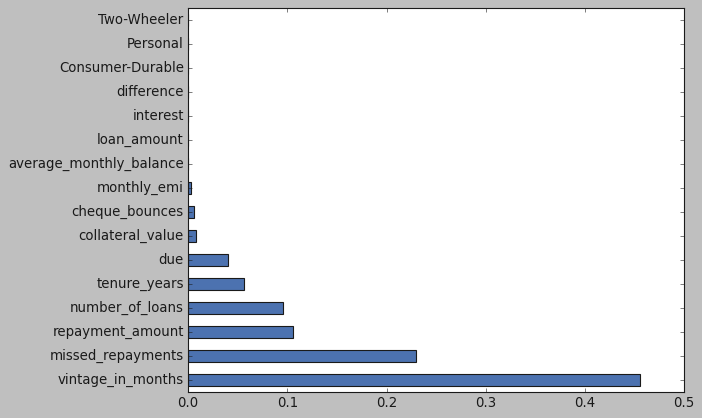

In [105]:
feat_importances = pd.Series(gbr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

### Using XGBoost Regressor

In [106]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [107]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [108]:
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('R_squared: %.3f (%.3f)' % (scores.mean(), scores.std()) )

R_squared: 0.982 (0.001)


In [109]:
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('R_squared: %.3f (%.3f)' % (scores.mean(), scores.std()) )

R_squared: 0.975 (0.002)


In [110]:
from xgboost import XGBRegressor
# define model
RegModel=XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=500, objective='reg:linear', booster='gbtree')

In [111]:
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

[17:37:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
train score:  0.9041451588803657
test score:  0.9011599396979381


### Using Adaboost Regressor

In [112]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(n_estimators=500,learning_rate=0.1)
Adaboost=ada_reg.fit(X_train,y_train)
prediction=Adaboost.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=Adaboost.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train score:  0.7645127581450882
test score:  0.769464873670634


### Using ElasticNet : Hybrid Regularized Model

In [113]:
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [114]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [115]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train,y_train)   
    score = model.score(X_train,y_train)
    pred_y = model.predict(X_test)
    mse = mean_squared_error(y_test, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.78, MSE:0.01, RMSE:0.10
Alpha:0.0010, R2:0.77, MSE:0.01, RMSE:0.10
Alpha:0.0100, R2:0.75, MSE:0.01, RMSE:0.11
Alpha:0.1000, R2:0.55, MSE:0.02, RMSE:0.15
Alpha:0.3000, R2:0.01, MSE:0.05, RMSE:0.22
Alpha:0.5000, R2:0.00, MSE:0.05, RMSE:0.22
Alpha:0.7000, R2:0.00, MSE:0.05, RMSE:0.22
Alpha:1.0000, R2:0.00, MSE:0.05, RMSE:0.22


In [116]:
elastic=ElasticNet(alpha=0.001).fit(X_train, y_train)
y_pred = elastic.predict(X_test)
score = elastic.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.780, MSE:0.01, RMSE:0.10


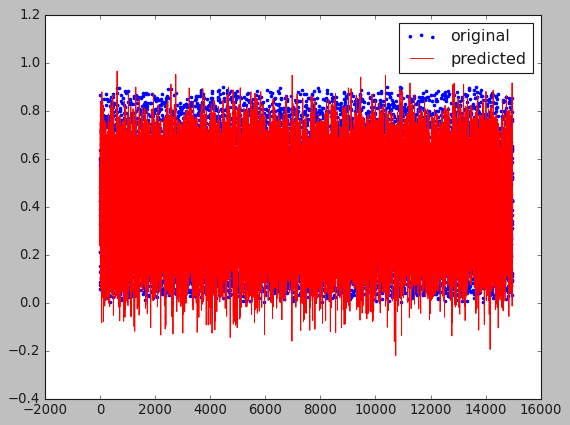

In [117]:
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [118]:
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(X_train, y_train)
print("Alpha: ",model.alpha_)
print("Intercept: ",model.intercept_)

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Alpha:  0.0001
Intercept:  0.4241654676370259


In [119]:
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.781, MSE:0.01, RMSE:0.10


### Using LightGBM

In [120]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [121]:
plt.style.use('ggplot')
import lightgbm as ltb

In [122]:
model = ltb.LGBMRegressor()
model.fit(X_train, y_train)
print(); print(model)

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



LGBMRegressor()


In [123]:
y_pred = model.predict(X_test)
print("Rsqaured on test data: ",metrics.r2_score(y_test, y_pred))

Rsqaured on test data:  0.965125001305115


### Model Evaluation: Hyperparameter Tuning

In [124]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
params = { 'max_depth': [3,4,5],
           'learning_rate': [0.01, 0.05, 0.1,0.25,0.5,0.015,1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='r2', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 1000}


In [125]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
# define the model with best resulted parameters
RegModel=XGBRegressor(colsample_bytree= 0.7, max_depth=3, learning_rate=0.5, n_estimators=1000, objective='reg:linear', booster='gbtree')
xgbr = xgb.XGBRegressor(seed = 20)
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

[19:26:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
train score:  0.9976735242733454
test score:  0.9951954973633294


#### So, we can finalize fine tuned XGBoost as well as it is giving us 99.5% Rsqaured on test data

### Prediction on Unseen Data

In [126]:
data.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'target', 'due',
       'average_monthly_balance', 'difference', 'Consumer-Durable', 'Personal',
       'Two-Wheeler'],
      dtype='object')

In [127]:
test_data.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'due', 'average_monthly_balance',
       'difference', 'Consumer-Durable', 'Personal', 'Two-Wheeler'],
      dtype='object')

In [128]:
test_data = sc.fit_transform(test_data)

In [129]:
test_data = pd.DataFrame(test_data)

In [130]:
test_data.columns = ['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'due',
       'average_monthly_balance', 'difference', 'Consumer-Durable', 'Personal',
       'Two-Wheeler']

In [131]:
#Making predictions
final_predictions = XGB.predict(test_data)
final_prediction_series = pd.Series(final_predictions)

In [132]:
#Combining the results into dataframe
submission_df = pd.DataFrame({'id':test['loan_acc_num'].values, 'LGD':final_prediction_series.values})

In [133]:
submission_df.sample(10)

,id,LGD
9698,LN19642643,0.696152
8739,LN41528746,0.543563
9479,LN14992390,0.071671
1994,LN78857834,0.318796
7400,LN34816489,0.321770
6756,LN45641021,0.817783
9190,LN65225447,0.165739
1385,LN40399680,0.718820
9179,LN11333579,0.666537
3950,LN50004539,0.357976


In [134]:
submission_df.to_csv("submission.csv",index=False)